In [61]:
import matplotlib.pyplot as plt

In [62]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
m = len(x)

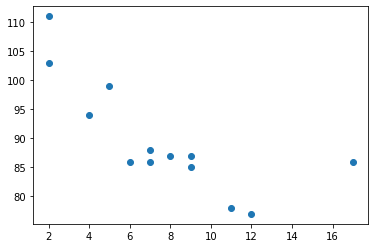

In [63]:
plt.scatter(x,y)

In [64]:
w = 1
b = 1
alpha = 0.01

In [65]:
# returns y hat
def predict(xi,w,b):
    return w*xi + b

def calculate_cost(w,b):
    global x,m
    sum = 0
    for i,xi in enumerate(x):
        y_hat = predict(xi,w,b)
        sum += (y_hat - y[i])**2
    return sum  / (2*m)
        

In [66]:
def prt_derivative_of_cost_wrt_w():
    global x,y,m
    sum = 0
    for i,xi in enumerate(x):
        y_hat = predict(xi,w,b)
        sum += (y_hat - y[i])*xi
    return sum  / m
def prt_derivative_of_cost_wrt_b():
    global x,y,m
    sum = 0
    for i,xi in enumerate(x):
        y_hat = predict(xi,w,b)
        sum += y_hat - y[i]
    return sum  / m

In [67]:
def gradient_descent():
    global w,b
    # dummy initializations to cost variables
    prev_cost = 0
    curr_cost = 1
    while curr_cost != prev_cost:
        prev_cost = calculate_cost(w,b)
        temp_w = w - alpha*prt_derivative_of_cost_wrt_w()
        temp_b = b - alpha*prt_derivative_of_cost_wrt_b()
        w = temp_w
        b = temp_b
        curr_cost = calculate_cost(w,b)
print("before gradient descent, cost function was: ", calculate_cost(w,b))
gradient_descent()
print("after gradient descent, cost function is: ", calculate_cost(w,b))

before gradient descent, cost function was:  3372.0384615384614
after gradient descent, cost function is:  18.19488311541697


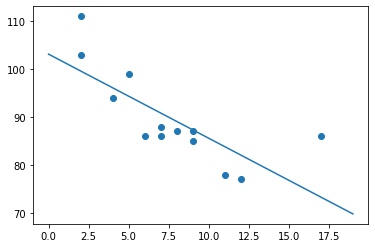

In [68]:
line_x = [i for i in range(20)]
line_y = [w*point_x+b for point_x in line_x]
plt.plot(line_x,line_y)
plt.scatter(x,y)
plt.show()